In [1]:
import pyterrier as pt

In [2]:
# Read full_results.csv with pandas
import pandas as pd
full_results = pd.read_csv("full_results.csv")
full_results

,Unnamed: 0,name,qid,measure,value
0,51948,TerrierRetr(BM25),100004,map,0.146644
1,51949,TerrierRetr(BM25),100004,bpref,0.428571
2,51950,TerrierRetr(BM25),100004,recip_rank,1.000000
3,51951,TerrierRetr(BM25),100004,P.5,0.200000
4,51952,TerrierRetr(BM25),100004,P.10,0.100000
...,...,...,...,...,...
97519,25186,TerrierRetr(TF_IDF),999610,P.10,0.000000
97520,25187,TerrierRetr(TF_IDF),999610,P.1000,0.000000
97521,25188,TerrierRetr(TF_IDF),999610,ndcg,0.000000
97522,25189,TerrierRetr(TF_IDF),999610,ndcg_cut_5,0.000000


In [3]:
set(full_results["measure"])

{'P.10',
 'P.1000',
 'P.5',
 'bpref',
 'map',
 'ndcg',
 'ndcg_cut_10',
 'ndcg_cut_5',
 'recip_rank'}

In [4]:
# Filter to just get the P.5 measure
p5_results = full_results[full_results["measure"] == "P.5"]
p5_results

,Unnamed: 0,name,qid,measure,value
3,51951,TerrierRetr(BM25),100004,P.5,0.2
12,52023,TerrierRetr(BM25),100051,P.5,0.0
21,64569,TerrierRetr(BM25),10008,P.5,0.0
30,52149,TerrierRetr(BM25),100090,P.5,0.4
39,52293,TerrierRetr(BM25),100167,P.5,0.0
...,...,...,...,...,...
97482,15753,TerrierRetr(TF_IDF),9975,P.5,0.0
97491,2775,TerrierRetr(TF_IDF),99759,P.5,0.2
97500,22233,TerrierRetr(TF_IDF),997612,P.5,0.0
97509,2946,TerrierRetr(TF_IDF),99866,P.5,0.0


<Axes: title={'center': 'BM25 P@5'}, xlabel='qid'>

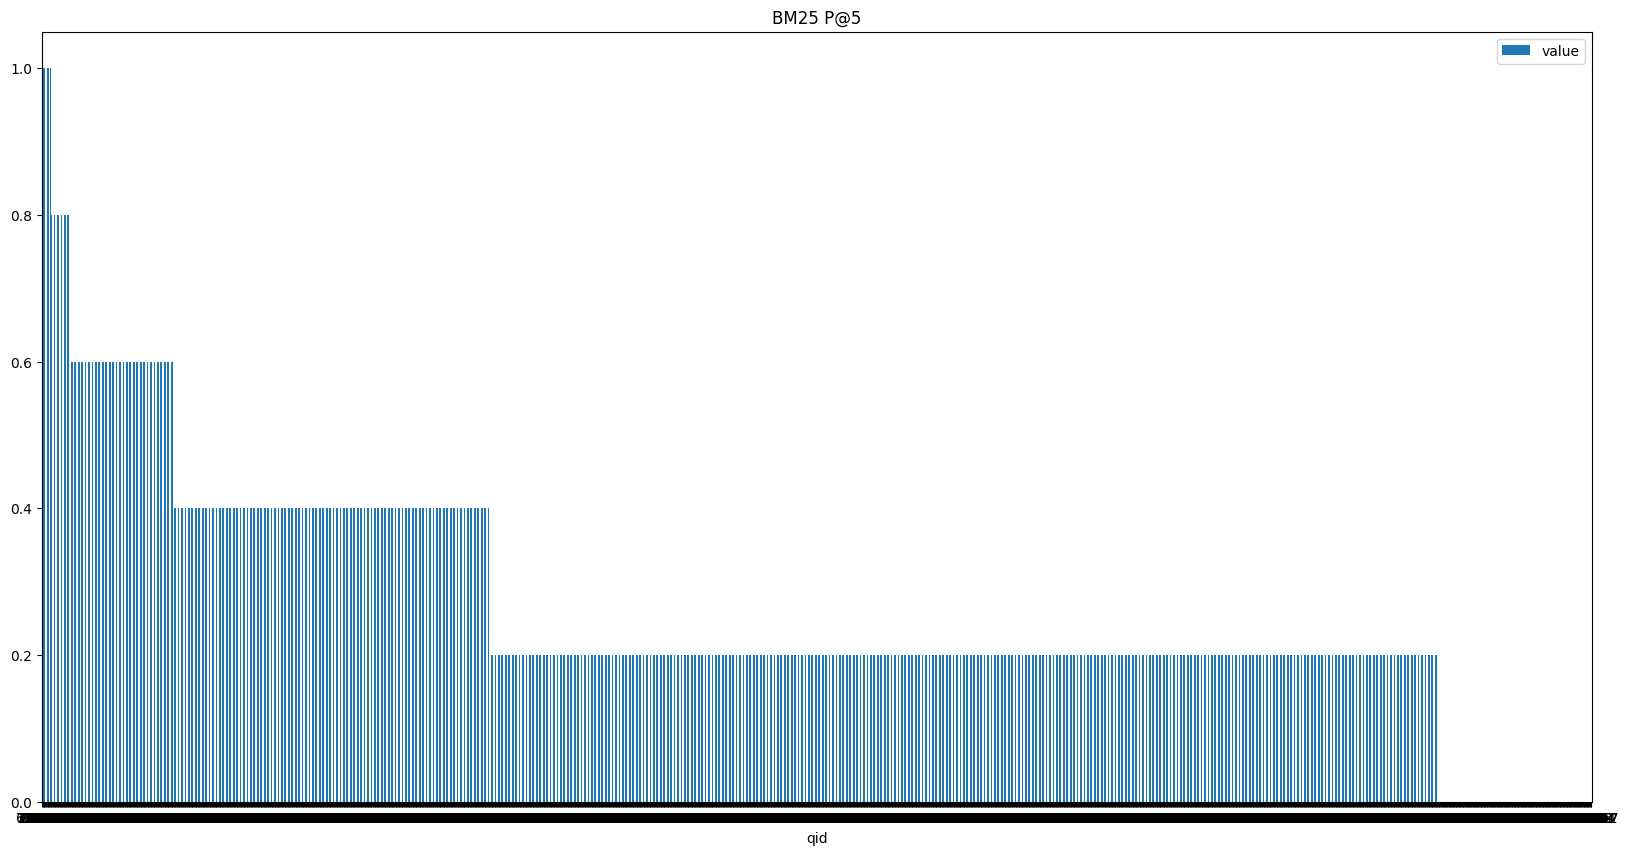

In [5]:
# Take the bm25
p5_bm25 = p5_results[p5_results["name"] == 'TerrierRetr(BM25)']

# Sort by value
p5_bm25 = p5_bm25.sort_values(by='value', ascending=False)
p5_bm25 = p5_bm25.head(2000)

# Print the highest and lowest qid
# print("Highest qid: ", p5_bm25.iloc[0])
hi_bm25_qid = p5_bm25.iloc[0]["qid"]
lo_bm25_qid = p5_bm25.iloc[-1]["qid"]
# print("Lowest qid: ", p5_bm25.iloc[-1])

p5_bm25.plot.bar(x='qid', y='value', rot=0, figsize=(20,10), title="BM25 P@5")




<Axes: title={'center': 'TF-IDF P@5'}, xlabel='qid'>

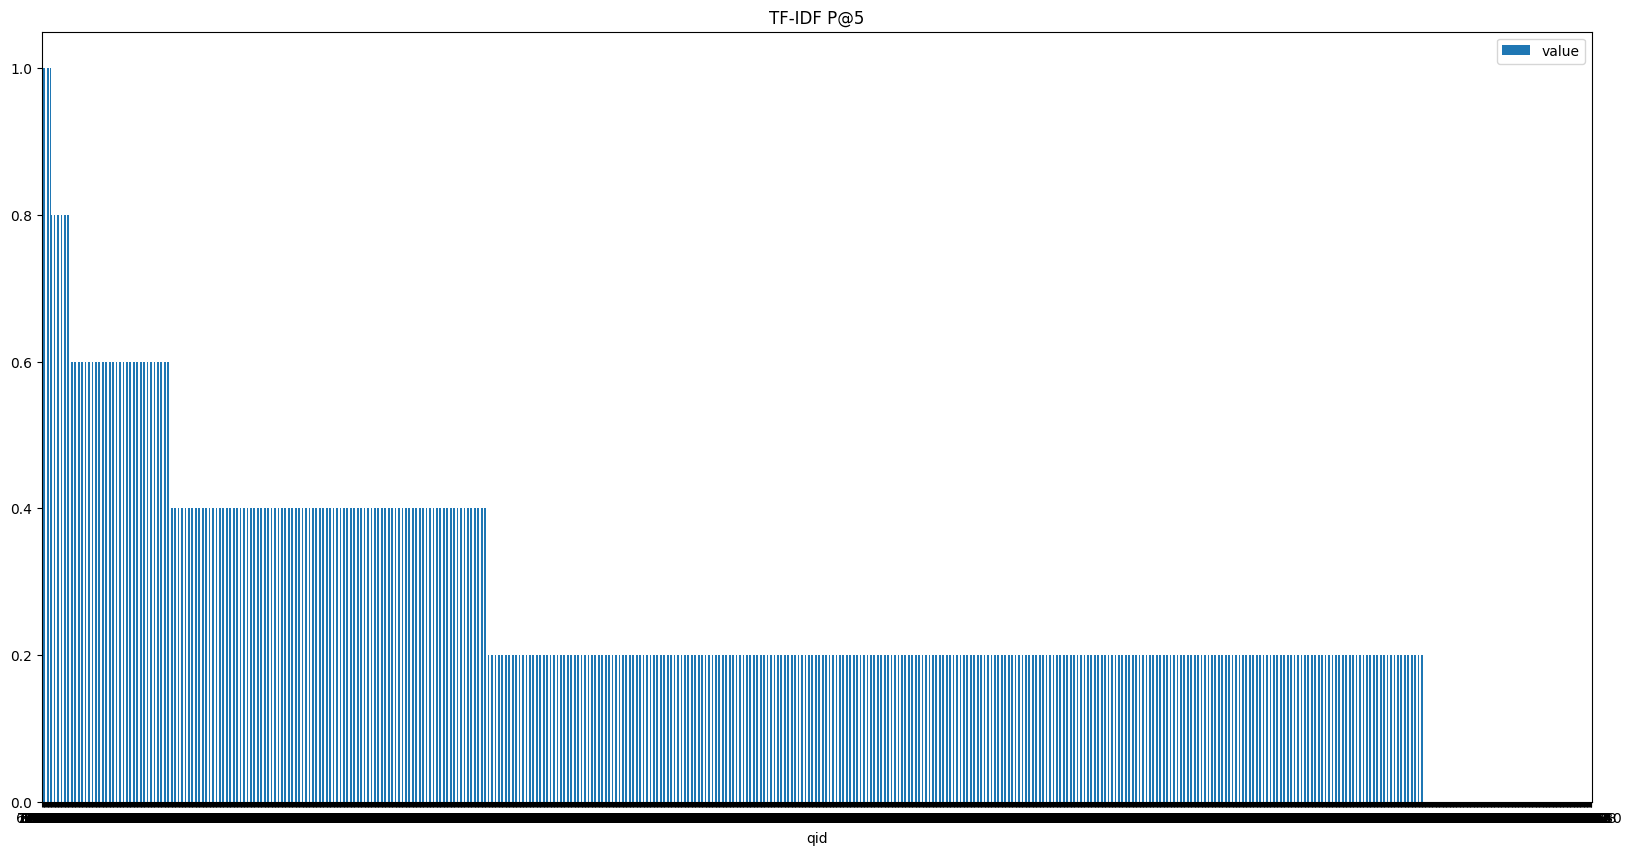

In [6]:
# Take the bm25
p5_tfidf = p5_results[p5_results["name"] == 'TerrierRetr(TF_IDF)']

# Sort by value
p5_tfidf = p5_tfidf.sort_values(by='value', ascending=False)
p5_tfidf = p5_tfidf.head(2000)

hi_tfidf_qid = p5_tfidf.iloc[0]["qid"]
lo_tfidf_qid = p5_tfidf.iloc[-1]["qid"]

p5_tfidf.plot.bar(x='qid', y='value', rot=0, figsize=(20,10), title="TF-IDF P@5")

In [7]:
sig_results = pd.read_csv("sig_results.csv")
metrics = sig_results[["name", "map", "bpref", "recip_rank", "P.5", "P.10", "P.1000", "ndcg", "ndcg_cut_5", "ndcg_cut_10"]]

In [8]:
metrics.T

,0,1
name,TerrierRetr(TF_IDF),TerrierRetr(BM25)
map,0.091587,0.093052
bpref,0.37899,0.385364
recip_rank,0.245233,0.248863
P.5,0.09498,0.095903
P.10,0.065467,0.066427
P.1000,0.002475,0.002519
ndcg,0.210386,0.213552
ndcg_cut_5,0.116022,0.11737
ndcg_cut_10,0.128354,0.12982


In [9]:
# Read in queries and documents dataframes
queries = pd.read_json('data/in/topics_1.json')
documents = pd.read_json('data/in/Answers.json')

In [31]:
p5_bm25

,Unnamed: 0,name,qid,measure,value
40305,86250,TerrierRetr(BM25),713265,P.5,1.0
37605,70032,TerrierRetr(BM25),636597,P.5,1.0
42636,86907,TerrierRetr(BM25),779376,P.5,1.0
43041,57792,TerrierRetr(BM25),791888,P.5,1.0
13683,74289,TerrierRetr(BM25),180612,P.5,1.0
...,...,...,...,...,...
3910,96979,TerrierRetr(BM25),1145017,P.5,0.0
38289,91461,TerrierRetr(BM25),651441,P.5,0.0
38298,91668,TerrierRetr(BM25),651574,P.5,0.0
3900,51015,TerrierRetr(BM25),1145,P.5,0.0


In [32]:
# Now let's read the results for the highest and lowest qid

## TF-IDF
tf_results = pt.io.read_results("data/out/results/full/TerrierRetr(BM25).res.gz", format="trec")

In [43]:
tf_results[tf_results["qid"] == '654342']

,qid,docno,rank,score,name
5211000,654342,1957,0,25.451013,pyterrier
5211001,654342,388725,1,24.693376,pyterrier
5211002,654342,904143,2,24.437901,pyterrier
5211003,654342,201887,3,24.366887,pyterrier
5211004,654342,425122,4,24.119321,pyterrier
...,...,...,...,...,...
5211995,654342,145647,995,13.816971,pyterrier
5211996,654342,142161,996,13.816397,pyterrier
5211997,654342,646467,997,13.814976,pyterrier
5211998,654342,1053489,998,13.813687,pyterrier


In [44]:
print("Title: ", queries[queries['Id'] == 654342]['Title'].values[0])
print("Body: ", queries[queries['Id'] == 654342]['Body'].values[0])
print("Tags: ", queries[queries['Id'] == 654342]['Tags'].values[0])

Title:  FTP Server on Ubuntu
Body:  <p>I'm looking for an FTP server application for my headless server, which is a public virtual machine with a public ip address. . I've narrowed it down to 3, at least from what I've read are the most adept.</p><ul><li><code>vsftpd</code></li><li><code>proftpd</code></li><li><code>pure-ftp</code></li></ul><p>I've been researching all 3 but my primary concern is that I need one account that can upload but not see the contents of the folder/directories once it is logged in. </p><p>We had been using <code>filezilla</code> server on a Windows server but we've had to move to Ubuntu. I've not installed any of these applications before and I was wondering if any of them support this on Ubuntu. If they do, how would I go about setting that up?</p>
Tags:  ['ftp']


In [45]:
documents[documents['Id'] == 537867]
print("Text: ", documents[documents['Id'] == 537867]['Text'].values[0])

Text:  <p>On server machine:</p><pre><code>sudo service proftpd restart</code></pre><p>then</p><pre><code>netstat -tpan | grep 21</code></pre><p>make sure proftp is open on the server machine on 0.0.0.0 or public ip</p><p>Use </p><pre><code>nmap my.server.ip.num</code></pre><p>from the client machine to make sure the port is open (21).</p>


In [48]:
sig_results = pd.read_csv("sig_results.csv")
sig_results[['map p-value', 'bpref p-value', 'recip_rank p-value', 'P.5 p-value', 'P.10 p-value', 'P.1000 p-value', 'ndcg p-value', 'ndcg_cut_5 p-value', 'ndcg_cut_10 p-value']].T

,0,1
map p-value,NaN,1.522263e-08
bpref p-value,NaN,1.400249e-17
recip_rank p-value,NaN,2.592248e-04
P.5 p-value,NaN,7.193027e-02
P.10 p-value,NaN,7.463486e-04
P.1000 p-value,NaN,2.516679e-28
ndcg p-value,NaN,1.372730e-22
ndcg_cut_5 p-value,NaN,6.237538e-03
ndcg_cut_10 p-value,NaN,4.200238e-04
